<font color='#FF6F00'><center><h1>Генерация кода. TensorFlow</h1></center></font>
<center><h2>MBPP - Mostly Basic Python Problems</h2>

В этом блокноте показано, как генерировать код Python на основе NLP с использованием TensorFlow и датасет MBPP
<font color='#FF6F00'><h2>Вступление</h2></font>

[Генерация кода](https://paperswithcode.com/task/text-to-code-generation) — это задача, в которой мы можем генерировать код по запросу пользователя. 
Его можно также использовать для создания помощника. Это помогает ускорить реализацию, а также снизить их зависимость от внешних ресурсов.

<font color='#FF6F00'><h2>Импорты</h2></font>

Для начала нам понадобится импортировать необходимые библиотеки:

- *TensorFlow*
- *transformers*
- *datasets*
- *tf-keras*
- *torch*
- *matplotlib*
- *scoreblue*

In [5]:
%pip install -q datasets

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install transformers

   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
    --------------------------------------- 0.3/10.8 MB ? eta -:--:--
   ------- -------------------------------- 2.1/10.8 MB 7.8 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/10.8 MB 8.7 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.8 MB 9.1 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/10.8 MB 10.0 MB/s eta 0:00:01
   -------------------------------------- - 10.5/10.8 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 10.8/10.8 MB 8.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.5 MB 8.5 MB/s eta 0:00:01
   -------------------- ------------------- 1.3/2.5 MB 3.5 MB/s eta 0:00:01
   ----------------------------- ---------- 1.8/2.5 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 3.2 MB/s eta 0:00:00

   ------------- ----

In [44]:
%pip install sacrebleu


   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------- ----------------------------- 1.0/4.0 MB 7.2 MB/s eta 0:00:01
   ------------------------------- -------- 3.1/4.0 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 10.0 MB/s eta 0:00:00

   -------------------- ------------------- 2/4 [lxml]
   -------------------- ------------------- 2/4 [lxml]
   -------------------- ------------------- 2/4 [lxml]
   ------------------------------ --------- 3/4 [sacrebleu]
   ---------------------------------------- 4/4 [sacrebleu]

Note: you may need to restart the kernel to use updated packages.


In [45]:
%pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 6.7 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 7.5 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 10.7 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 10.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------- ------- 1.8/2.2 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 7.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------- -------------------------------- 1.3/7.0 MB 7.4 MB/s eta 0:00:01
   ---------------- ----------------------- 2.9/7.0 MB 7.3 MB/s eta 0:00:01
   ------------------------- -------------- 4.5/7.0 MB 7.2 MB/s eta 0:00:01
   ---------------------------

In [16]:
%pip install torch


   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/216.1 MB 1.2 MB/s eta 0:03:01
   ---------------------------------------- 1.0/216.1 MB 1.4 MB/s eta 0:02:34
   ---------------------------------------- 1.3/216.1 MB 1.4 MB/s eta 0:02:31
   ---------------------------------------- 1.8/216.1 MB 1.6 MB/s eta 0:02:15
   ---------------------------------------- 2.4/216.1 MB 1.7 MB/s eta 0:02:03
    --------------------------------------- 2.9/216.1 MB 1.9 MB/s eta 0:01:52
    --------------------------------------- 3.7/216.1 MB 2.1 MB/s eta 0:01:42
    --------------------------------------- 4.5/216.1 MB 2.3 MB/s eta 0:01:33
   - -------------------------------------- 5.5/216.1 MB 2.5 MB/s eta 0:01:24
   - -------------------------------------- 6.6/216.1 MB 2.8 MB/s eta 0:01:16
   - -

In [9]:
%pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import time
import math
import random
import datetime
from pathlib import Path

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1" 
import tensorflow as tf

from transformers import *
from datasets import load_dataset

logging.set_verbosity_warning()
logging.set_verbosity_error()

import logging

print('TF version',tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU'))) # проверяем доступно ли GPU

C:\Users\User\anaconda3\envs\TextToCode\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



TF version 2.19.0
Num GPUs Available:  0


In [20]:
import random
import matplotlib.pyplot as plt
import sacrebleu
from datasets import load_dataset


<font color='#FF6F00'><h2>Установка стратегии</h2></font>

Для одного GPU использую OneDeviceStrategy все переменные, созданные в его области действия, явно размещаются на указанном устройстве. 
Любые функции, вызываемые через OneDeviceStrategy.run, также будут размещены на указанном устройстве. 
Ввод, распределенный через эту стратегию, будет предварительно загружен на указанное устройство. 
В стратегии по умолчанию распределение ввода отсутствует.

In [ ]:
def setup_strategy(xla, fp16, no_cuda):
    print(" Tensorflow: setting up strategy")

    if xla:
        print(" XLA Enabled")
        tf.config.optimizer.set_jit(True)

    if fp16:
        print(" Mixed Precision Training Enabled")
        policy = tf.keras.mixed_precision.experimental.Policy("mixed_float16")
        tf.keras.mixed_precision.experimental.set_policy(policy)

    gpus = tf.config.list_physical_devices("GPU")
    if no_cuda:
        strategy = tf.distribute.OneDeviceStrategy(device="/cpu:0")
    else:
        if len(gpus) == 0:
            print(" One Device Strategy [CPU] Enabled")
            strategy = tf.distribute.OneDeviceStrategy(device="/cpu:0")
        elif len(gpus) == 1:
            print(" One Device Strategy [GPU] Enabled")
            strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")
        elif len(gpus) > 1:
            print(" Mirrored Strategy Enabled")
            strategy = tf.distribute.MirroredStrategy()
        else:
            strategy = tf.distribute.get_strategy()

    return strategy

def n_replicas(strategy):
    return strategy.num_replicas_in_sync

strategy = setup_strategy(xla=True, fp16=False, no_cuda=False)

 Tensorflow: setting up strategy
 XLA Enabled
 One Device Strategy [CPU] Enabled


In [14]:
import os
os.chdir("C:/Users/User/Desktop/tts/")
current_directory = os.getcwd()
print(current_directory)
# Устанавливаем текущую директорию для правильной работы путей к файлам

C:\Users\User\Desktop\tts


<a id="section6"><font color='#FF6F00'><h2>MBPP (Mostly Basic Python Problems)</h2></font></a>

Набор данных Mostly Basic Programming Problems был представлен [здесь](https://arxiv.org/pdf/2108.07732.pdf). Он содержит 974 короткие функции Python, разработанные для решения программистами начального уровня, текстовые описания этих программ и тестовые случаи для проверки функциональной корректности. Этот набор данных состоит из большого набора вопросов, полученных с помощью краудсорсинга, и меньшего набора вопросов, отредактированных и проверенных вручную авторами.

- Оригинальный набор данных [mbpp](https://github.com/google-research/google-research/tree/master/mbpp).

<a id="section7"><font color='#FF6F00'><h2>Анализ данных</h2></font></a>

In [1]:
%pip install radon


   -------------------- ------------------- 1/2 [radon]
   -------------------- ------------------- 1/2 [radon]
   ---------------------------------------- 2/2 [radon]

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install wordcloud

In [12]:
%pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   --- ------------------------------------ 1.0/10.7 MB 7.2 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/10.7 MB 8.4 MB/s eta 0:00:01
   -------------------- ------------------- 5.5/10.7 MB 10.5 MB/s eta 0:00:01
   ----------------------------- ---------- 7.9/10.7 MB 10.1 MB/s eta 0:00:01
   ---------------------------------- ----- 9.2/10.7 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 8.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   - -------------------------------------- 1.3/41.3 MB 7.5 MB/s eta 0:00:06
   -- ------------------------------------- 2.9/41.3 MB 7.0 MB/s eta 0:00:06
   ---- ----------------------------------- 4.2/41.3 MB 6.8 MB/s eta 0:00:06
   ----- ---------------------------------- 5.8/41.3 MB 6.9 MB/s eta 0:00:06
   ------

In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import radon.complexity as complexity
import radon.metrics as metrics
import radon.visitors as visitors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

file_path = 'mbpp.jsonl'
data = []
with open(file_path, 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)

print("Dataset Information:")
print(df.info())
print("\nFirst few entries:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   text                 974 non-null    object
 1   code                 974 non-null    object
 2   task_id              974 non-null    int64 
 3   test_setup_code      974 non-null    object
 4   test_list            974 non-null    object
 5   challenge_test_list  974 non-null    object
dtypes: int64(1), object(5)
memory usage: 45.8+ KB
None

First few entries:
                                                text  \
0  Write a function to find the minimum cost path...   
1  Write a function to find the similar elements ...   
2  Write a python function to identify non-prime ...   
3  Write a function to find the largest integers ...   
4  Write a function to find the number of ways to...   

                                                code  task_id test_set

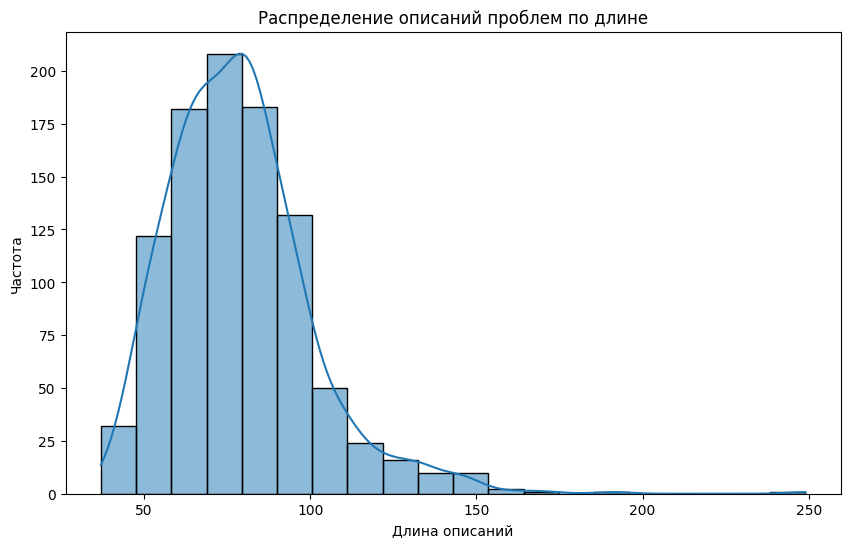

In [17]:
df['description_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['description_length'], bins=20, kde=True)
plt.title('Распределение описаний проблем по длине')
plt.xlabel('Длина описаний')
plt.ylabel('Частота')
plt.show()

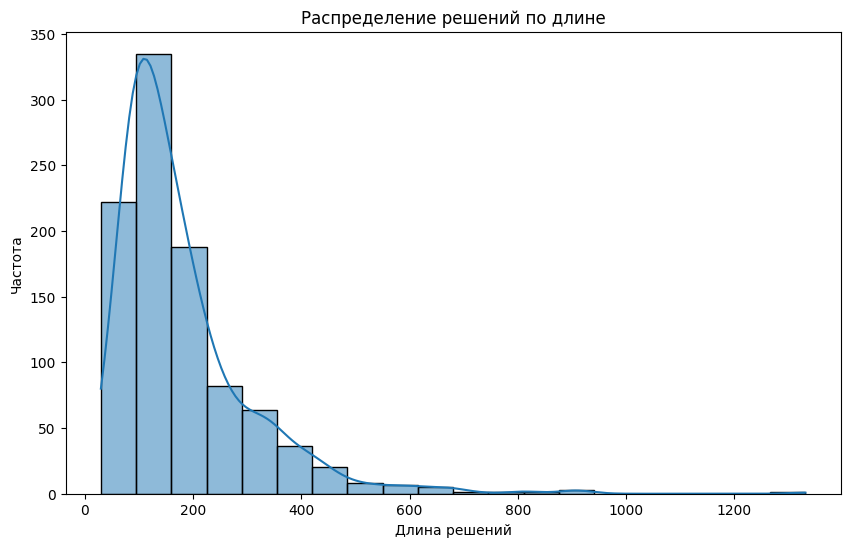

In [18]:
df['code_length'] = df['code'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['code_length'], bins=20, kde=True)
plt.title('Распределение решений по длине')
plt.xlabel('Длина решений')
plt.ylabel('Частота')
plt.show()

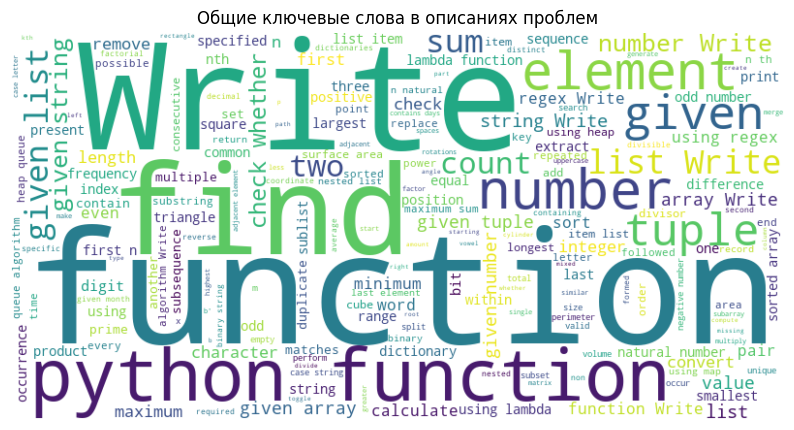

In [19]:
desc_text = " ".join(df['text'])
desc_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(desc_text)
plt.figure(figsize=(10, 6))
plt.imshow(desc_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Общие ключевые слова в описаниях проблем')
plt.show()

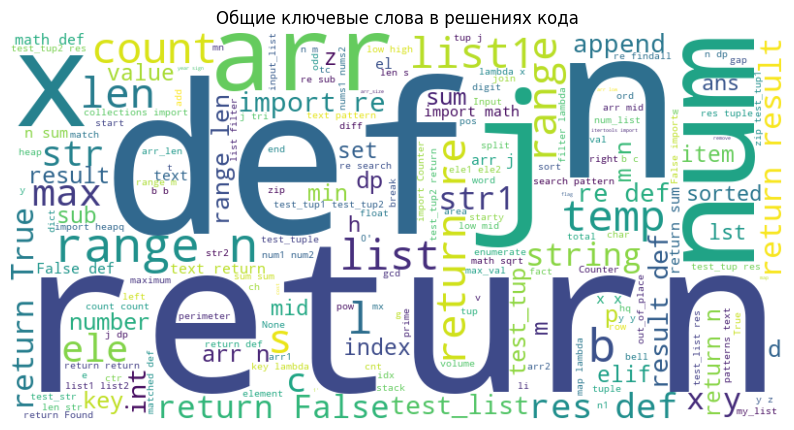

In [20]:
code_text = " ".join(df['code'])
code_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(code_text)
plt.figure(figsize=(10, 6))
plt.imshow(code_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Общие ключевые слова в решениях кода')
plt.show()

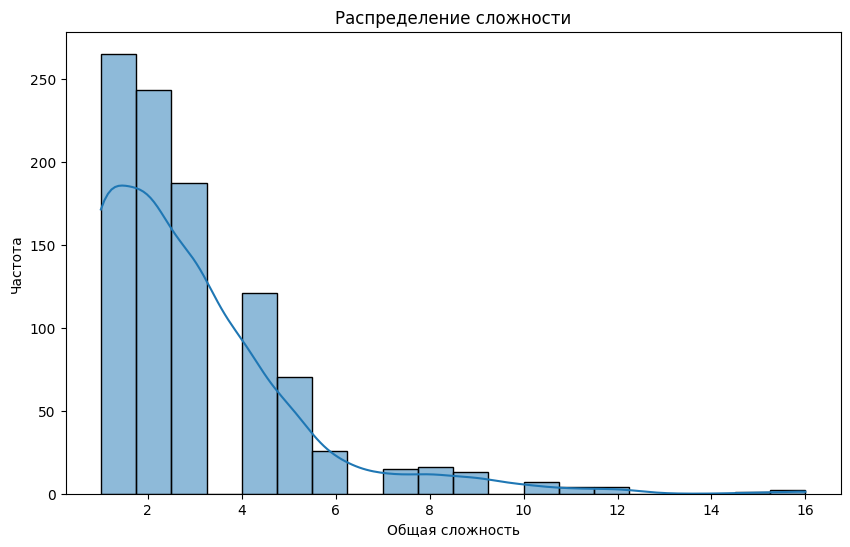

In [21]:
df['cyclomatic_complexity'] = df['code'].apply(lambda x: complexity.cc_visit(x))
df['lines_of_code'] = df['code'].apply(lambda x: len(x.split('\n')))
df['total_complexity'] = df['cyclomatic_complexity'].apply(lambda x: sum(item.complexity for item in x))
plt.figure(figsize=(10, 6))
sns.histplot(df['total_complexity'], bins=20, kde=True)
plt.title('Распределение сложности')
plt.xlabel('Общая сложность')
plt.ylabel('Частота')
plt.show()

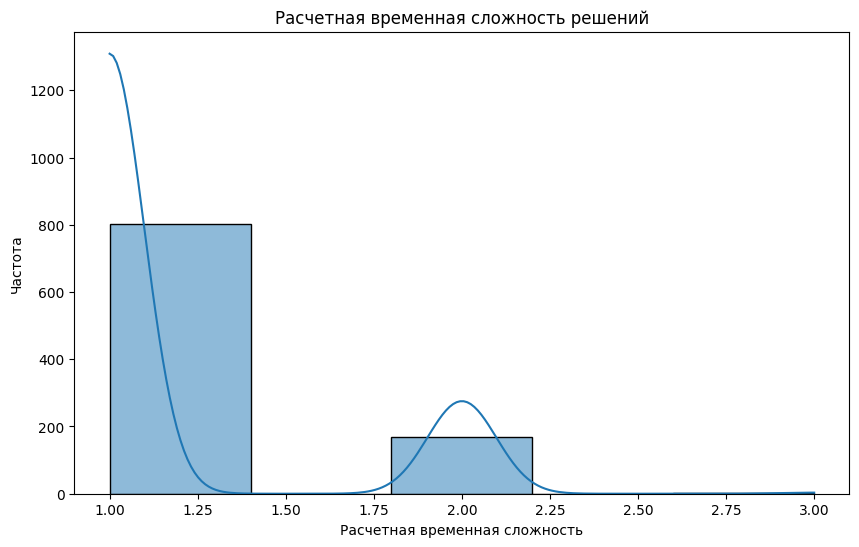

In [28]:
def estimate_time_complexity(code):
    complexity_score = 1
    if 'for' in code and 'for' in code.split('for', 1)[1]:
        complexity_score += 1
    if 'while' in code and 'while' in code.split('while', 1)[1]:
        complexity_score += 1
    if any(keyword in code for keyword in ['recursion', 'recursive', 'recur']):
        complexity_score += 2
    return complexity_score

df['estimated_time_complexity'] = df['code'].apply(estimate_time_complexity)
plt.figure(figsize=(10, 6))
sns.histplot(df['estimated_time_complexity'], bins=5, kde=True)
plt.title('Расчетная временная сложность решений')
plt.xlabel('Расчетная временная сложность')
plt.ylabel('Частота')
plt.show()

<font color='#FF6F00'><h3>Результаты</h3></font>
- Набор данных содержит разнообразный набор проблем с различной длиной описаний и решений
- Читаемость кода различается, некоторые решения имеют более высокие соотношения комментариев к коду, что указывает на лучшую документацию
- Потенциальные улучшения включают добавление более разнообразных тестовых случаев, улучшение описаний проблем

<a id="section7"><font color='#FF6F00'><h2>Датасет</h2></font></a>

Представлен полный процесс от загрузки данных до обработки и преобразования в объект TensorFlow `tf.data.Dataset`

In [ ]:
def download_dataset(cache_dir):
    # загрузка данных, используя keras utility
    _url = "https://raw.githubusercontent.com/google-research/google-research/master/mbpp/mbpp.jsonl"
    dataset_path = tf.keras.utils.get_file("mbpp.jsonl", origin=_url, cache_dir=cache_dir, cache_subdir=cache_dir)
    return dataset_path

In [ ]:
def convert_examples_to_features(examples, tokenizer, args):
    texts = examples['text']
    codes = examples['code']

    inputs = [args.prefix + text for text in texts]
    model_inputs = tokenizer(inputs, max_length=args.max_input_length, padding="max_length", truncation=True)

    labels = tokenizer(codes, max_length=args.max_target_length, padding="max_length", truncation=True).input_ids

    labels_with_ignore_index = []
    for labels_example in labels:
        labels_example = [label if label != 0 else -100 for label in labels_example]
        labels_with_ignore_index.append(labels_example)
    model_inputs["labels"] = labels_with_ignore_index

    # возвращаем признаки
    return model_inputs

In [ ]:
def get_train_tfdataset(train_dataset, num_train_examples, args):
    # выбираем колонки признаков
    columns = ['input_ids', 'attention_mask', 'labels']
    # устонавливаем tensorflow формат
    train_dataset.set_format(type='tensorflow', columns=columns)

    # указываем тип возвращаемых данных
    return_types = {'input_ids':tf.int32, 'attention_mask':tf.int32, 'labels':tf.int32}
    # указываем формы
    return_shapes = {'input_ids': tf.TensorShape([None]),'attention_mask': tf.TensorShape([None]), 'labels': tf.TensorShape([None])}
    # создаем датасет
    tf_dataset = tf.data.Dataset.from_generator(lambda : train_dataset, return_types, return_shapes)

    options = tf.data.Options()
    options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.OFF
    tf_dataset = tf_dataset.with_options(options)

    ds = (
        tf_dataset.repeat()
        .shuffle(num_train_examples, seed=args.seed)
        .batch(args.train_batch_size)
        .prefetch(tf.data.AUTOTUNE)
    )

    return strategy.experimental_distribute_dataset(ds)

In [ ]:
def get_validation_tfdataset(eval_dataset, num_validation_examples, args):
    columns = ['input_ids', 'attention_mask', 'labels']
    eval_dataset.set_format(type='tensorflow', columns=columns)

    return_types = {'input_ids':tf.int32, 'attention_mask':tf.int32, 'labels':tf.int32}
    return_shapes = {'input_ids': tf.TensorShape([None]),'attention_mask': tf.TensorShape([None]), 'labels': tf.TensorShape([None])}
    tf_dataset = tf.data.Dataset.from_generator(lambda : eval_dataset, return_types, return_shapes)

    options = tf.data.Options()
    options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.OFF
    tf_dataset = tf_dataset.with_options(options)

    ds = (
        tf_dataset.repeat()
        .batch(args.validation_batch_size)
        .prefetch(tf.data.AUTOTUNE)
    )

    return strategy.experimental_distribute_dataset(ds)

<a id="section8"><font color='#FF6F00'><h2>Полезные функции</h2></font></a>

- *fix_all_seeds()* - устанавливает сид для случайных чисел
- *init_logger()* - создаем логгер
- *ProgressBar()* - свой прогерсс-бар для отображения метрик

In [ ]:
def fix_all_seeds(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

In [ ]:
def init_logger(log_file=None, log_file_level=logging.NOTSET):
    if isinstance(log_file, Path):
        log_file = str(log_file)
    log_format = logging.Formatter(
        fmt='%(asctime)s - %(levelname)s - %(name)s -   %(message)s',
        datefmt='%m/%d/%Y %H:%M:%S'
    )
    logger = logging.getLogger()
    logger.setLevel(logging.INFO)
    console_handler = logging.StreamHandler()
    console_handler.setFormatter(log_format)
    logger.handlers = [console_handler]
    if log_file and log_file != '':
        file_handler = logging.FileHandler(log_file)
        file_handler.setLevel(log_file_level)
        logger.addHandler(file_handler)
    return logger

In [ ]:
class ProgressBar(object):
    def __init__(self, n_total,width=30,desc = 'Training'):
        self.width = width
        self.n_total = n_total
        self.start_time = time.time()
        self.desc = desc

    def __call__(self, step, info={}):
        now = time.time()
        current = step + 1
        recv_per = current / self.n_total
        bar = f'[{self.desc}] {current}/{self.n_total} ['
        if recv_per >= 1:
            recv_per = 1
        prog_width = int(self.width * recv_per)
        if prog_width > 0:
            bar += '=' * (prog_width - 1)
            if current< self.n_total:
                bar += ">"
            else:
                bar += '='
        bar += '.' * (self.width - prog_width)
        bar += ']'
        show_bar = f"\r{bar}"
        time_per_unit = (now - self.start_time) / current
        if current < self.n_total:
            eta = time_per_unit * (self.n_total - current)
            if eta > 3600:
                eta_format = ('%d:%02d:%02d' %
                              (eta // 3600, (eta % 3600) // 60, eta % 60))
            elif eta > 60:
                eta_format = '%d:%02d' % (eta // 60, eta % 60)
            else:
                eta_format = '%ds' % eta
            time_info = f' - ETA: {eta_format}'
        else:
            if time_per_unit >= 1:
                time_info = f' {time_per_unit:.1f}s/step'
            elif time_per_unit >= 1e-3:
                time_info = f' {time_per_unit * 1e3:.1f}ms/step'
            else:
                time_info = f' {time_per_unit * 1e6:.1f}us/step'

        show_bar += time_info
        if len(info) != 0:
            show_info = f'{show_bar} ' + \
                        "-".join([f' {key}: {value:.4f} ' if key != "learning_rate" else f' {key}: {value:.8f} ' for key, value in info.items()])
            print(show_info, end='')
        else:
            print(show_bar, end='')

<font color='#FF6F00'><h2>Цикл обучения</h2></font>

Определяем класс Trainer для цикла обучения и оценки

1. Итерация каждой эпохи. Эпоха — это один проход по набору данных
2. В пределах эпохи итерация по каждому примеру в обучающем наборе данных, захватывая его признаки (x) и метку (y)
3. Используя признаки, делаем прогноз и сравните его с меткой. Измеряем неточность прогноза и используем ее для расчета потерь и градиентов модели
4. Используем оптимизатор для обновления параметров модели
5. Отслеживаем статистику
6. Повторяем для каждой эпохи

In [ ]:
class Trainer:
    def __init__(
        self, model, args, train_dataset, validation_dataset,
        num_train_examples, num_validation_examples, tokenizer
    ):
        self.model = model
        self.args = args

        self.train_dataset = train_dataset
        self.num_train_examples = num_train_examples

        self.validation_dataset = validation_dataset
        self.num_validation_examples = num_validation_examples

        self.global_step = 0
        self.eval_loss = tf.keras.metrics.Sum()

        self.save_version = 1
        self.tokenizer = tokenizer


    def create_optimizer_and_scheduler(self, num_training_steps):
        num_warmup_steps = math.ceil(num_training_steps * self.args.warmup_ratio)
        self.optimizer, self.lr_scheduler = create_optimizer(
            init_lr=self.args.learning_rate,
            num_train_steps=num_training_steps,
            num_warmup_steps=num_warmup_steps,
            weight_decay_rate=self.args.weight_decay,
            adam_epsilon=self.args.adam_epsilon
        )

    def evaluation_step(self, features, labels, nb_instances_in_global_batch):
        outputs = self.model(input_ids=features['input_ids'], attention_mask=features['attention_mask'], labels=labels, training=False)[:2]
        loss, logits = outputs[:2]
        scaled_loss = loss / tf.cast(nb_instances_in_global_batch, dtype=loss.dtype)
        self.eval_loss.update_state(scaled_loss)

    @tf.function
    def distributed_evaluation_steps(self, batch):
        features = {k: v for k, v in batch.items() if 'labels' not in k}
        labels = batch['labels']
        nb_instances = tf.reduce_sum(tf.cast(labels != -100, dtype=tf.int32))
        inputs = (features, labels, nb_instances)
        strategy.run(self.evaluation_step, inputs)

    def evaluate(self):
        steps = math.ceil(self.num_validation_examples / self.args.validation_batch_size)
        self.eval_loss.reset_states()
        logs = {}
        pbar = ProgressBar(n_total=steps, desc='Evaluating')
        for step, batch in enumerate(self.validation_dataset):
            self.distributed_evaluation_steps(batch)
            logs["eval_loss"] = self.eval_loss.result() / (step + 1)
            pbar(step=step, info=logs)
            if step == steps - 1:
                break
        print("\n------------- validation result -----------------")

    def apply_gradients(self, features, labels, nb_instances_in_global_batch):
        outputs = self.model(input_ids=features['input_ids'], attention_mask=features['attention_mask'], labels=labels, training=True)[:2]
        loss, logits = outputs[:2]
        scaled_loss = loss / tf.cast(nb_instances_in_global_batch, dtype=loss.dtype)
        gradients = tf.gradients(scaled_loss, self.model.trainable_variables)
        gradients = [g if g is not None else tf.zeros_like(v) for g, v in zip(gradients, self.model.trainable_variables)]
        self.optimizer.apply_gradients(list(zip(gradients, self.model.trainable_variables)))
        self.train_loss.update_state(scaled_loss)

    @tf.function
    def distributed_training_steps(self, batch):
        with strategy.scope():
            features = {k: v for k, v in batch.items() if 'labels' not in k}
            labels = batch['labels']
            nb_instances = tf.reduce_sum(tf.cast(labels != -100, dtype=tf.int32))
            inputs = (features, labels, nb_instances)
            strategy.run(self.apply_gradients, inputs)

    def train(self):
        num_updates_per_epoch = self.num_train_examples // args.train_batch_size
        self.steps_per_epoch = num_updates_per_epoch
        t_total = self.steps_per_epoch * self.args.epochs

        with strategy.scope():
            self.create_optimizer_and_scheduler(num_training_steps=t_total)

            folder = os.path.join(self.args.output_dir, self.args.checkpoint_dir)
            ckpt = tf.train.Checkpoint(optimizer=self.optimizer, model=self.model)
            self.model.ckpt_manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=1)
            iterations = self.optimizer.iterations

            logger.info("***** Running training *****")
            logger.info(f"  Num examples = {self.num_train_examples}")
            logger.info(f"  Num Epochs = {self.args.epochs}")
            logger.info(f"  Total train batch size (w. parallel & distributed) = {self.args.train_batch_size * n_replicas(strategy)}")
            logger.info(f"  Steps per epoch = {self.steps_per_epoch}")
            logger.info(f"  Total optimization steps = {t_total}")

            self.train_loss = tf.keras.metrics.Sum(name="training_loss")
            start_time = datetime.datetime.now()
            for epoch_iter in range(self.args.epochs):
                logger.info(f"Epoch {epoch_iter + 1}/{self.args.epochs}")

                pbar = ProgressBar(n_total=self.steps_per_epoch, desc='Training')
                for step, batch in enumerate(self.train_dataset):
                    self.distributed_training_steps(batch)

                    self.global_step = iterations.numpy()
                    training_loss = self.train_loss.result() / (step + 1)

                    logs = {}
                    logs["training_loss"] = training_loss.numpy()
                    logs["learning_rate"] = self.lr_scheduler(self.global_step).numpy()
                    pbar(step=step, info=logs)

                    if self.global_step % self.steps_per_epoch == 0:
                        print("\n------------- train result -----------------")
                        self.evaluate()
                        ckpt_save_path = self.model.ckpt_manager.save()
                        logger.info(f"Saving checkpoint at {ckpt_save_path}")
                        break
                if epoch_iter%10==0:
                    save_subdir = os.path.join(self.args.save_dir, f"version_{self.save_version}")
                    os.makedirs(save_subdir, exist_ok=True)
                    self.model.save_pretrained(save_subdir)
                    self.tokenizer.save_pretrained(save_subdir)
                    logger.info(f"Model saved in {save_subdir}")
                    self.save_version += 1

                self.train_loss.reset_states()
            end_time = datetime.datetime.now()
            logger.info(f"Training took: {str(end_time - start_time)}")

<font color='#FF6F00'><h2>Запуск</h2></font>

- Функция `run()` определяет наш процесс выполнения. 
- Мы скачиваем, загружаем, обрабатываем и преобразуем наши данные в формат `tf.data.Dataset`. 
- Мы инициализируем токенизатор и модель.
- Мы создаем экземпляр нашего `Trainer` и передаем все в метод `.train()` 
- В конце мы сохраняем нашу модель и токенизатор с помощью метода `.save_pretrained()`.

In [ ]:
def run(args):
    logger.info(" Starting training / evaluation")

    logger.info(" Downloading Data Files")
    dataset_path = download_dataset(args.cache_dir)

    logger.info(" Loading Data Files")
    dataset = load_dataset('json', data_files=dataset_path)

    dataset = dataset['train'].train_test_split(0.1, shuffle=False)

    logger.info(" Initializing Tokenizer")
    tokenizer = RobertaTokenizer.from_pretrained(args.tokenizer_name)

    logger.info(" Preparing Features")
    dataset = dataset.map(convert_examples_to_features, batched=True, fn_kwargs={"tokenizer":tokenizer, "args":args})

    logger.info(" Intializing training and validation dataset ")
    train_dataset = dataset['train']
    num_train_examples = len(dataset['train'])

    tf_train_dataset = get_train_tfdataset(train_dataset, num_train_examples, args)

    validation_dataset = dataset['test']
    num_validation_examples = len(dataset['test'])

    tf_validation_dataset = get_validation_tfdataset(train_dataset, num_validation_examples, args)

    logger.info(f' Intializing model | {args.model_type.upper()} ')
    with strategy.scope():
        model = TFT5ForConditionalGeneration.from_pretrained(args.model_name_or_path, from_pt=True)

    trainer = Trainer(model, args, tf_train_dataset, tf_validation_dataset, num_train_examples, num_validation_examples,tokenizer)
    trainer.train()

    logger.info(f" Saving model in {args.save_dir}")
    trainer.model.save_pretrained(args.save_dir)
    tokenizer.save_pretrained(args.save_dir)

<font color='#FF6F00'><h2>Начало обучения</h2></font>

- Мы определяем обучающие аргументы - модель, данные, оптимизатор, обучение и инициализируем каталоги. 
- Инициализируем регистратор для регистрации и отслеживания метрик.
- Мы вызываем `fix_all_seeds()`, чтобы установить глобальное начальное значение. 
- Затем мы выполняем метод `run()`, передавая `args`.

In [ ]:
class Args:

    # Модель
    model_type = 't5'
    tokenizer_name = 'Salesforce/codet5-base'
    model_name_or_path = 'Salesforce/codet5-base'

    # Данные
    train_batch_size = 8
    validation_batch_size = 8
    max_input_length = 48
    max_target_length = 128
    prefix = "Generate Python: "

    # Оптимайзер
    learning_rate = 3e-4
    weight_decay = 1e-4
    warmup_ratio = 0.2
    adam_epsilon = 1e-8

    # Обучение
    seed = 2025
    epochs = 20

    # Директории
    output_dir = "runs/"
    logging_dir = f"{output_dir}/logs/"
    checkpoint_dir = f"checkpoint"
    save_dir = f"{output_dir}/saved_model/"
    cache_dir = '../working/'
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    Path(logging_dir).mkdir(parents=True, exist_ok=True)
    Path(save_dir).mkdir(parents=True, exist_ok=True)



args = Args()
logger = init_logger(log_file=os.path.join(args.logging_dir, f"{args.model_type}-{time.strftime('%Y-%m-%d-%H-%M-%S', time.localtime())}.log"))
fix_all_seeds(args.seed)

if __name__ == "__main__":
    dataset = run(args)

07/05/2025 20:04:12 - INFO - root -    Starting training / evaluation
07/05/2025 20:04:12 - INFO - root -    Downloading Data Files
07/05/2025 20:04:12 - INFO - root -    Loading Data Files
07/05/2025 20:04:12 - INFO - root -    Initializing Tokenizer
07/05/2025 20:04:13 - INFO - root -    Preparing Features
07/05/2025 20:04:16 - INFO - root -    Intializing training and validation dataset 
07/05/2025 20:04:16 - INFO - root -    Intializing model | T5 
07/05/2025 20:04:26 - INFO - root -   ***** Running training *****
07/05/2025 20:04:26 - INFO - root -     Num examples = 876
07/05/2025 20:04:26 - INFO - root -     Num Epochs = 20
07/05/2025 20:04:26 - INFO - root -     Total train batch size (w. parallel & distributed) = 8
07/05/2025 20:04:26 - INFO - root -     Steps per epoch = 109
07/05/2025 20:04:26 - INFO - root -     Total optimization steps = 2180
07/05/2025 20:04:26 - INFO - root -   Epoch 1/20


[Training] 109/109 [==============================] 9.6s/step  training_loss: 0.0071 - learning_rate: 0.00007500    
------------- train result -----------------
[Evaluating] 13/13 [==============================] 3.0s/step  eval_loss: 0.0030  
------------- validation result -----------------


07/05/2025 20:22:35 - INFO - absl -   Sharding callback duration: 0 microseconds
07/05/2025 20:22:40 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-1
07/05/2025 20:22:40 - INFO - root -   Epoch 2/20


[Training] 109/109 [==============================] 8.4s/step  training_loss: 0.0029 - learning_rate: 0.00015000   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.6s/step  eval_loss: 0.0021 
------------- validation result -----------------


07/05/2025 20:38:26 - INFO - absl -   Sharding callback duration: 0 microseconds
07/05/2025 20:38:35 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-2
07/05/2025 20:38:35 - INFO - root -   Epoch 3/20


[Training] 109/109 [==============================] 8.3s/step  training_loss: 0.0023 - learning_rate: 0.00022500   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.6s/step  eval_loss: 0.0017 
------------- validation result -----------------


07/05/2025 20:54:13 - INFO - absl -   Sharding callback duration: 0 microseconds
07/05/2025 20:54:17 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-3
07/05/2025 20:54:17 - INFO - root -   Epoch 4/20


[Training] 109/109 [==============================] 8.6s/step  training_loss: 0.0020 - learning_rate: 0.00030000   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.5s/step  eval_loss: 0.0013 
------------- validation result -----------------


07/05/2025 21:10:25 - INFO - absl -   Sharding callback duration: 0 microseconds
07/05/2025 21:10:36 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-4
07/05/2025 21:10:36 - INFO - root -   Epoch 5/20


[Training] 109/109 [==============================] 8.3s/step  training_loss: 0.0016 - learning_rate: 0.00028125   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.5s/step  eval_loss: 0.0010 
------------- validation result -----------------


07/05/2025 21:26:17 - INFO - absl -   Sharding callback duration: 0 microseconds
07/05/2025 21:26:20 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-5
07/05/2025 21:26:20 - INFO - root -   Epoch 6/20


[Training] 109/109 [==============================] 8.4s/step  training_loss: 0.0013 - learning_rate: 0.00026250   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.6s/step  eval_loss: 0.0007 
------------- validation result -----------------


07/05/2025 21:42:11 - INFO - absl -   Sharding callback duration: 0 microseconds
07/05/2025 21:42:15 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-6
07/05/2025 21:42:15 - INFO - root -   Epoch 7/20


[Training] 109/109 [==============================] 8.3s/step  training_loss: 0.0010 - learning_rate: 0.00024375   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.5s/step  eval_loss: 0.0006 
------------- validation result -----------------


07/05/2025 21:57:48 - INFO - absl -   Sharding callback duration: 0 microseconds
07/05/2025 21:57:52 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-7
07/05/2025 21:57:52 - INFO - root -   Epoch 8/20


[Training] 109/109 [==============================] 8.3s/step  training_loss: 0.0008 - learning_rate: 0.00022500   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.4s/step  eval_loss: 0.0004 
------------- validation result -----------------


07/05/2025 22:13:31 - INFO - absl -   Sharding callback duration: 1001 microseconds
07/05/2025 22:13:39 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-8
07/05/2025 22:13:39 - INFO - root -   Epoch 9/20


[Training] 109/109 [==============================] 8.1s/step  training_loss: 0.0006 - learning_rate: 0.00020625   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.5s/step  eval_loss: 0.0002 
------------- validation result -----------------


07/05/2025 22:28:50 - INFO - absl -   Sharding callback duration: 0 microseconds
07/05/2025 22:28:54 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-9
07/05/2025 22:28:54 - INFO - root -   Epoch 10/20


[Training] 109/109 [==============================] 8.2s/step  training_loss: 0.0005 - learning_rate: 0.00018750   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.5s/step  eval_loss: 0.0002 
------------- validation result -----------------


07/05/2025 22:44:21 - INFO - absl -   Sharding callback duration: 0 microseconds
07/05/2025 22:44:27 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-10
07/05/2025 22:44:27 - INFO - root -   Epoch 11/20


[Training] 109/109 [==============================] 8.2s/step  training_loss: 0.0004 - learning_rate: 0.00016875   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.6s/step  eval_loss: 0.0001 
------------- validation result -----------------


07/05/2025 22:59:57 - INFO - absl -   Sharding callback duration: 0 microseconds
07/05/2025 23:00:05 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-11
07/05/2025 23:00:05 - INFO - root -   Epoch 12/20


[Training] 109/109 [==============================] 8.3s/step  training_loss: 0.0003 - learning_rate: 0.00015000   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.5s/step  eval_loss: 0.0001 
------------- validation result -----------------


07/05/2025 23:15:39 - INFO - absl -   Sharding callback duration: 0 microseconds
07/05/2025 23:15:47 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-12
07/05/2025 23:15:47 - INFO - root -   Epoch 13/20


[Training] 109/109 [==============================] 8.2s/step  training_loss: 0.0002 - learning_rate: 0.00013125   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.6s/step  eval_loss: 0.0001 
------------- validation result -----------------


07/05/2025 23:31:17 - INFO - absl -   Sharding callback duration: 0 microseconds
07/05/2025 23:31:26 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-13
07/05/2025 23:31:26 - INFO - root -   Epoch 14/20


[Training] 109/109 [==============================] 8.2s/step  training_loss: 0.0002 - learning_rate: 0.00011250   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.5s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/05/2025 23:46:55 - INFO - absl -   Sharding callback duration: 0 microseconds
07/05/2025 23:47:02 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-14
07/05/2025 23:47:02 - INFO - root -   Epoch 15/20


[Training] 109/109 [==============================] 8.2s/step  training_loss: 0.0002 - learning_rate: 0.00009375   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.6s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 00:02:30 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 00:02:36 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-15
07/06/2025 00:02:36 - INFO - root -   Epoch 16/20


[Training] 109/109 [==============================] 8.2s/step  training_loss: 0.0001 - learning_rate: 0.00007500   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.5s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 00:18:05 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 00:18:14 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-16
07/06/2025 00:18:14 - INFO - root -   Epoch 17/20


[Training] 109/109 [==============================] 8.2s/step  training_loss: 0.0001 - learning_rate: 0.00005625   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.6s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 00:33:47 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 00:33:53 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-17
07/06/2025 00:33:53 - INFO - root -   Epoch 18/20


[Training] 109/109 [==============================] 8.2s/step  training_loss: 0.0001 - learning_rate: 0.00003750   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.6s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 00:49:24 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 00:49:28 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-18
07/06/2025 00:49:28 - INFO - root -   Epoch 19/20


[Training] 109/109 [==============================] 8.3s/step  training_loss: 0.0001 - learning_rate: 0.00001875   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 3.0s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 01:05:12 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 01:05:16 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-19
07/06/2025 01:05:16 - INFO - root -   Epoch 20/20


[Training] 109/109 [==============================] 8.2s/step  training_loss: 0.0001 - learning_rate: 0.00000000   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.5s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 01:20:47 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 01:20:51 - INFO - root -   Saving checkpoint at runs/checkpoint\ckpt-20
07/06/2025 01:20:51 - INFO - root -   Training took: 5:16:25.288424
07/06/2025 01:20:51 - INFO - root -    Saving model in runs//saved_model/


<font color='#FF6F00'><h2>Предсказание</h2></font>

- Метод `predict_from_dataset()` и `predict_from_text()` - предсказание модели по вопросам датасета или вводу пользователя

- `run_predict()` - это основная функция для генерации ответа

- В `predict_from_dataset()` мы случайным образом выбираем индекс из тестового набора данных для генерации

- Мы используем технику выборки Top-p (ядро) для декодирования

- `Top-p` также можно использовать в сочетании с `Top-K`, что позволяет избегать слов с очень низким рейтингом, допуская при этом некоторый динамический выбор.

- `Reptition_penalty` можно использовать для штрафования слов, которые уже были сгенерированы или принадлежат контексту.

- Чтобы получить несколько независимо выбранных выходных данных, мы можем снова установить параметр `num_return_sequences` > 1.

In [18]:
def run_predict(args, text):
    # Загрузка сохраненной модели дообученной модели
    model = TFT5ForConditionalGeneration.from_pretrained(args.save_dir)
    # Загрузка сохраненного токенайзера
    tokenizer = RobertaTokenizer.from_pretrained(args.save_dir)

    query = args.prefix + text
    encoded_text = tokenizer(query, return_tensors='tf', padding='max_length', truncation=True, max_length=args.max_input_length)

    generated_code = model.generate(
        encoded_text["input_ids"], attention_mask=encoded_text["attention_mask"],
        max_length=args.max_target_length, top_p=0.95, top_k=50, repetition_penalty=2.0, num_return_sequences=1
    )

    decoded_code = tokenizer.decode(generated_code.numpy()[0], skip_special_tokens=True)
    return decoded_code

def predict_from_dataset(args):
    dataset = load_dataset('json', data_files='mbpp.jsonl')

    dataset = dataset['train'].train_test_split(0.1, shuffle=False)
    test_dataset = dataset['test']

    index = random.randint(0, len(test_dataset))
    text = test_dataset[index]['text']
    code = test_dataset[index]['code']

    decoded_code = run_predict(args, text)

    print("#" * 25); print("QUERY: ", text);
    print()
    print('#' * 25); print("ORIGINAL: "); print("\n", code);
    print()
    print('#' * 25); print("GENERATED: "); print("\n", decoded_code);

def predict_from_text(args, text):
    decoded_code = run_predict(args, text)
    print("#" * 25); print("QUERY: ", text);
    print()
    print('#' * 25); print("GENERATED: "); print("\n", decoded_code);

<font color='#FF6F00'><h2>Предсказание по датасету</h2></font>


In [ ]:
predict_from_dataset(args)
predict_from_dataset(args)
predict_from_dataset(args)

#########################
QUERY:  Write a function to rearrange positive and negative numbers in a given array using lambda function.

#########################
ORIGINAL: 

 def rearrange_numbs(array_nums):
  result = sorted(array_nums, key = lambda i: 0 if i == 0 else -1 / i)
  return result 

#########################
GENERATED: 

 def rearrange_nums(array,n):
  result = list() 
	for i in range (0 , n-1), - 1:  
    if array[i] < 0 or arr[-index+1]:
        return None    
      else:\
          temp.append((x + y) for x,y within zip(*arrays))          
respondent lambda index : remove(_temp)[idx], tmp['title'])
            j=len(''.join([j])
               
#########################
QUERY:  Write a function to calculate the height of the given binary tree.

#########################
ORIGINAL: 

 class Node: 
	def __init__(self, data): 
		self.data = data 
		self.left = None
		self.right = None
def max_height(node): 
	if node is None: 
		return 0 ; 
	else : 
		left_height = max_heigh

<font color='#FF6F00'><h2>Предсказание по тексту</h2></font>


In [ ]:
predict_from_text(args, "Write a function to add two random numbers"); print()
predict_from_text(args, "Write a function to find the frequency of items in a list"); print()
predict_from_text(args, "Write a function to concatenate two dictionary"); print()

#########################
QUERY:  Write a function to add two random numbers

#########################
GENERATED: 

 def add_random(num1, num2):
    random = [0 for i in range (int((i / 2)), len([]).replace('', ''))]*numbers.Random() if n != 0:
        temp += a
            else:\
                number= total + 1
 return  value

#########################
QUERY:  Write a function to find the frequency of items in a list

#########################
GENERATED: 

 def freq_count(list1):
  result = [k for k, v in list 1.items()] 
  return results

#########################
QUERY:  Write a function to concatenate two dictionary

#########################
GENERATED: 

 def concatenate_dict(d1, d2):
    result = {k: v for (key , val) in zip(*map([strtify(), dd.items()]) if lenght>0} and dict[val] == k else 'None'for key, pvin doubts of data.').split(" ")) 
  return list((result.)



<a id="section12"><font color='#FF6F00'><h2>Метрики</h2></font></a>
BLEU (Bilingual Evaluation Understudy) — это автоматическая метрика оценки качества машинного перевода и других задач обработки естественного языка. 
Она измеряет сходство сгенерированного текста с одним или несколькими эталонными текстами.

<h3>Основные особенности BLEU</h3>
- *Использование n-граммов*
- *Коверсия*
- *Блочность*
- *Вычисление*

Предсказание для обученной модели

In [17]:
def evaluate_sample(args, sample):
    text = sample['text']
    reference_code = sample['code']
    generated_code = run_predict(args, text)
    return reference_code, generated_code

def compute_metrics(reference, candidate):
    # BLEU
    bleu_score = sacrebleu.corpus_bleu([candidate], [[reference]]).score
    return bleu_score

In [15]:
def metrics(args, num_samples=20):
    dataset = load_dataset('json', data_files='mbpp.jsonl')
    test_dataset = dataset['train'].train_test_split(0.1, shuffle=False)['test']

    bleu_scores = []

    for _ in range(num_samples):
        index = random.randint(0, len(test_dataset) - 1)
        sample = test_dataset[index]
        reference_code, generated_code = evaluate_sample(args, sample)
        bleu = compute_metrics(reference_code, generated_code)
        bleu_scores.append(bleu)

        print(f"Sample {_+1}:")
        print(f"QUERY: {sample['text']}")
        print(f"ORIGINAL: {sample['code']}")
        print(f"GENERATED: {generated_code}")
        print(f"BLEU: {bleu:.2f}")
        print("-" * 40)

    plt.figure(figsize=(10,5))
    plt.plot(range(1, num_samples+1), bleu_scores, label='BLEU')
    plt.xlabel('Sample Number')
    plt.ylabel('Score')
    plt.title('Evaluation Metrics per Sample')
    plt.legend()
    plt.grid()
    plt.show()

Предсказание для не обученной модели

In [19]:
def run_old_predict(args, text):
    model = TFT5ForConditionalGeneration.from_pretrained(args.model_name_or_path, from_pt=True)
    tokenizer = RobertaTokenizer.from_pretrained(args.tokenizer_name)

    query = args.prefix + text
    encoded_text = tokenizer(query, return_tensors='tf', padding='max_length', truncation=True, max_length=args.max_input_length)

    generated_code = model.generate(
        encoded_text["input_ids"], attention_mask=encoded_text["attention_mask"],
        max_length=args.max_target_length, top_p=0.95, top_k=50, repetition_penalty=2.0, num_return_sequences=1
    )

    decoded_code = tokenizer.decode(generated_code.numpy()[0], skip_special_tokens=True)
    return decoded_code

In [20]:
def evaluate_old_sample(args, sample):
    text = sample['text']
    reference_code = sample['code']
    generated_code = run_old_predict(args, text)
    return reference_code, generated_code

In [21]:
def old_metrics(args, num_samples=20):
    dataset = load_dataset('json', data_files='mbpp.jsonl')
    test_dataset = dataset['train'].train_test_split(0.1, shuffle=False)['test']

    bleu_scores = []

    for _ in range(num_samples):
        index = random.randint(0, len(test_dataset) - 1)
        sample = test_dataset[index]
        reference_code, generated_code = evaluate_old_sample(args, sample)
        bleu = compute_metrics(reference_code, generated_code)
        bleu_scores.append(bleu)

        print(f"Sample {_+1}:")
        print(f"QUERY: {sample['text']}")
        print(f"ORIGINAL: {sample['code']}")
        print(f"GENERATED: {generated_code}")
        print(f"BLEU: {bleu:.2f}")
        print("-" * 40)

    plt.figure(figsize=(10,5))
    plt.plot(range(1, num_samples+1), bleu_scores, label='BLEU')
    plt.xlabel('Sample Number')
    plt.ylabel('Score')
    plt.title('Evaluation Metrics per Sample')
    plt.legend()
    plt.grid()
    plt.show()

<font color='#FF6F00'><h2>Метрики обученной модели</h2></font>

После обучения модель смогла генерировать код, похожий на нужный. 
Возможно при большем количестве эпох и другой  модели (large вместо base) результаты будут лучше
Значение метрики BLEU от 0 до 90

Sample 1:
QUERY: Write a function to combine two given sorted lists using heapq module.
ORIGINAL: from heapq import merge
def combine_lists(num1,num2):
  combine_lists=list(merge(num1, num2))
  return combine_lists
GENERATED: import heapq
def combine_sortedlist(nums1, nums2):
  result = h q.merge(*map([heapval for i in range(_mini), pairs0)) 
   return list((result)
BLEU: 8.39
----------------------------------------
Sample 2:
QUERY: Write a python function to multiply all items in the list.
ORIGINAL: def multiply_list(items):
    tot = 1
    for x in items:
        tot *= x
    return tot
GENERATED: def multiply_list(num1, num2):
    result = [i*n for i in range (Num 1)] 
     return list
BLEU: 17.44
----------------------------------------
Sample 3:
QUERY: Write a function to find ln, m lobb number.
ORIGINAL: def binomial_coeff(n, k): 
	C = [[0 for j in range(k + 1)] 
			for i in range(n + 1)] 
	for i in range(0, n + 1): 
		for j in range(0, min(i, k) + 1): 
			if (j == 0 or j == i):

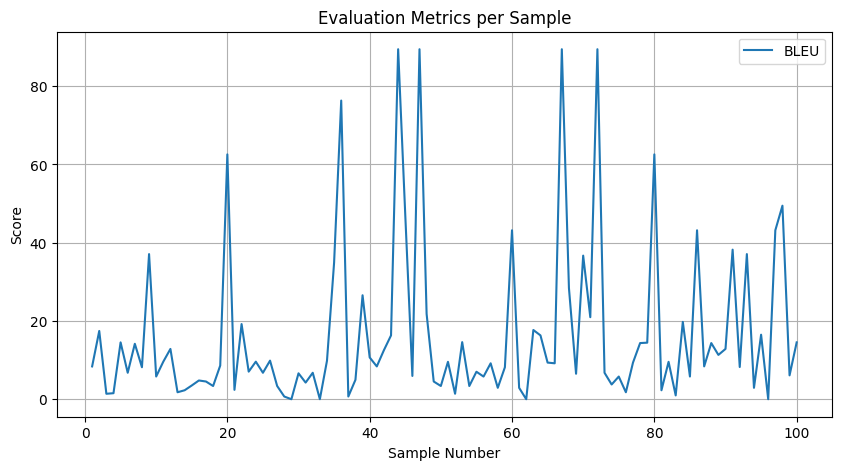

In [94]:
metrics(args,100)

<font color='#FF6F00'><h2>Метрики до обучения модели</h2></font>

До обучения модели на датасете, она не могла генерировать код даже близко похожий на нужный.
Значение метрики BLEU от 0 до 3

Sample 1:
QUERY: Write a function to perform chunking of tuples each of size n.
ORIGINAL: def chunk_tuples(test_tup, N):
  res = [test_tup[i : i + N] for i in range(0, len(test_tup), N)]
  return (res) 
GENERATED: .
BLEU: 0.00
----------------------------------------
Sample 2:
QUERY: Write a function that matches a string that has an 'a' followed by anything, ending in 'b' by using regex.
ORIGINAL: import re
def text_match(text):
  patterns = 'a.*?b$'
  if re.search(patterns,  text):
    return ('Found a match!')
  else:
    return ('Not matched!')
GENERATED: Example:function
BLEU: 0.00
----------------------------------------
Sample 3:
QUERY: Write a python function to get the last element of each sublist.
ORIGINAL: def Extract(lst): 
    return [item[-1] for item in lst] 
GENERATED: function
BLEU: 0.00
----------------------------------------
Sample 4:
QUERY: Write a function to return true if the given number is even else return false.
ORIGINAL: def even_num(x):
  if x%2==0:
     re

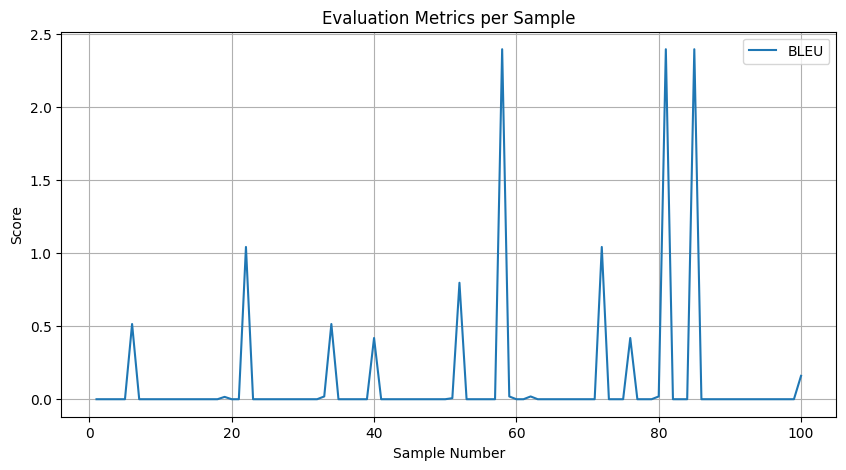

In [98]:
old_metrics(args,100)

<a id="section12"><font color='#FF6F00'><h2>Другие параметры</h2></font></a>
Попытка обучить модель с другими гипперпараметрами на большее число эпох для сравнения результата

In [13]:
class Args2:
    model_type = 't5'
    tokenizer_name = 'Salesforce/codet5-base'
    model_name_or_path = 'Salesforce/codet5-base'

    train_batch_size = 8
    validation_batch_size = 8
    max_input_length = 64
    max_target_length = 128 
    prefix = "Generate Python: "

    learning_rate = 1e-4
    weight_decay = 1e-4
    warmup_ratio = 0.05
    adam_epsilon = 1e-8

    seed = 2025
    epochs = 30

    output_dir = "run2/"
    logging_dir = f"{output_dir}/logs2/"
    checkpoint_dir = f"checkpoint2"
    save_dir = f"{output_dir}/saved_model2/"
    cache_dir = '../working2/'
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    Path(logging_dir).mkdir(parents=True, exist_ok=True)
    Path(save_dir).mkdir(parents=True, exist_ok=True)


args = Args2()
logger = init_logger(log_file=os.path.join(args.logging_dir, f"{args.model_type}-{time.strftime('%Y-%m-%d-%H-%M-%S', time.localtime())}.log"))
fix_all_seeds(args.seed)

if __name__ == "__main__":
    dataset = run(args)

07/06/2025 13:31:46 - INFO - root -    Starting training / evaluation
07/06/2025 13:31:46 - INFO - root -    Downloading Data Files
07/06/2025 13:31:46 - INFO - root -    Loading Data Files
07/06/2025 13:31:47 - INFO - root -    Initializing Tokenizer
07/06/2025 13:31:47 - INFO - root -    Preparing Features
Map: 100%|█████████████████████████████████████████████████████████████████████| 98/98 [00:00<00:00, 454.21 examples/s]
07/06/2025 13:31:52 - INFO - root -    Intializing training and validation dataset 
07/06/2025 13:31:53 - INFO - root -    Intializing model | T5 


07/06/2025 13:31:54 - WARNING - tensorflow -   From C:\Users\User\anaconda3\envs\TextToCode\lib\site-packages\tf_keras\src\backend.py:873: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

07/06/2025 13:32:00 - INFO - root -   ***** Running training *****
07/06/2025 13:32:00 - INFO - root -     Num examples = 876
07/06/2025 13:32:00 - INFO - root -     Num Epochs = 30
07/06/2025 13:32:00 - INFO - root -     Total train batch size (w. parallel & distributed) = 8
07/06/2025 13:32:00 - INFO - root -     Steps per epoch = 109
07/06/2025 13:32:00 - INFO - root -     Total optimization steps = 3270
07/06/2025 13:32:00 - INFO - root -   Epoch 1/30


[Training] 109/109 [==============================] 9.8s/step  training_loss: 0.0073 - learning_rate: 0.00006646    
------------- train result -----------------
[Evaluating] 13/13 [==============================] 3.2s/step  eval_loss: 0.0031  
------------- validation result -----------------


07/06/2025 13:50:28 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 13:50:32 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-1
07/06/2025 13:50:34 - INFO - root -   Model saved in run2//saved_model2/version_1
07/06/2025 13:50:34 - INFO - root -   Epoch 2/30


[Training] 109/109 [==============================] 9.0s/step  training_loss: 0.0030 - learning_rate: 0.00009826   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.8s/step  eval_loss: 0.0021 
------------- validation result -----------------


07/06/2025 14:07:31 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 14:07:36 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-2
07/06/2025 14:07:36 - INFO - root -   Epoch 3/30


[Training] 109/109 [==============================] 9.0s/step  training_loss: 0.0023 - learning_rate: 0.00009475   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.8s/step  eval_loss: 0.0017 
------------- validation result -----------------


07/06/2025 14:24:34 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 14:24:38 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-3
07/06/2025 14:24:38 - INFO - root -   Epoch 4/30


[Training] 109/109 [==============================] 9.0s/step  training_loss: 0.0020 - learning_rate: 0.00009124   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.8s/step  eval_loss: 0.0014 
------------- validation result -----------------


07/06/2025 14:41:30 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 14:41:39 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-4
07/06/2025 14:41:39 - INFO - root -   Epoch 5/30


[Training] 109/109 [==============================] 8.9s/step  training_loss: 0.0017 - learning_rate: 0.00008773   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.8s/step  eval_loss: 0.0011 
------------- validation result -----------------


07/06/2025 14:58:26 - INFO - absl -   Sharding callback duration: 1001 microseconds
07/06/2025 14:58:35 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-5
07/06/2025 14:58:35 - INFO - root -   Epoch 6/30


[Training] 109/109 [==============================] 8.9s/step  training_loss: 0.0015 - learning_rate: 0.00008422   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.8s/step  eval_loss: 0.0009 
------------- validation result -----------------


07/06/2025 15:15:24 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 15:15:28 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-6
07/06/2025 15:15:28 - INFO - root -   Epoch 7/30


[Training] 109/109 [==============================] 8.9s/step  training_loss: 0.0013 - learning_rate: 0.00008071   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.8s/step  eval_loss: 0.0007 
------------- validation result -----------------


07/06/2025 15:32:18 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 15:32:25 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-7
07/06/2025 15:32:25 - INFO - root -   Epoch 8/30


[Training] 109/109 [==============================] 8.9s/step  training_loss: 0.0011 - learning_rate: 0.00007721   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.8s/step  eval_loss: 0.0006 
------------- validation result -----------------


07/06/2025 15:49:13 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 15:49:16 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-8
07/06/2025 15:49:16 - INFO - root -   Epoch 9/30


[Training] 109/109 [==============================] 8.9s/step  training_loss: 0.0010 - learning_rate: 0.00007370   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.9s/step  eval_loss: 0.0005 
------------- validation result -----------------


07/06/2025 16:06:06 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 16:06:10 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-9
07/06/2025 16:06:10 - INFO - root -   Epoch 10/30


[Training] 109/109 [==============================] 8.9s/step  training_loss: 0.0009 - learning_rate: 0.00007019   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.8s/step  eval_loss: 0.0004 
------------- validation result -----------------


07/06/2025 16:22:58 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 16:23:02 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-10
07/06/2025 16:23:02 - INFO - root -   Epoch 11/30


[Training] 109/109 [==============================] 8.9s/step  training_loss: 0.0008 - learning_rate: 0.00006668   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.8s/step  eval_loss: 0.0003 
------------- validation result -----------------


07/06/2025 16:39:47 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 16:39:51 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-11
07/06/2025 16:39:54 - INFO - root -   Model saved in run2//saved_model2/version_2
07/06/2025 16:39:54 - INFO - root -   Epoch 12/30


[Training] 109/109 [==============================] 8.9s/step  training_loss: 0.0007 - learning_rate: 0.00006317   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.8s/step  eval_loss: 0.0002 
------------- validation result -----------------


07/06/2025 16:56:38 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 16:56:42 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-12
07/06/2025 16:56:42 - INFO - root -   Epoch 13/30


[Training] 109/109 [==============================] 8.9s/step  training_loss: 0.0006 - learning_rate: 0.00005966   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.8s/step  eval_loss: 0.0002 
------------- validation result -----------------


07/06/2025 17:13:33 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 17:13:37 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-13
07/06/2025 17:13:37 - INFO - root -   Epoch 14/30


[Training] 109/109 [==============================] 9.0s/step  training_loss: 0.0005 - learning_rate: 0.00005615   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.9s/step  eval_loss: 0.0001 
------------- validation result -----------------


07/06/2025 17:30:30 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 17:30:34 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-14
07/06/2025 17:30:34 - INFO - root -   Epoch 15/30


[Training] 109/109 [==============================] 9.0s/step  training_loss: 0.0005 - learning_rate: 0.00005264   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.8s/step  eval_loss: 0.0001 
------------- validation result -----------------


07/06/2025 17:47:29 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 17:47:33 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-15
07/06/2025 17:47:33 - INFO - root -   Epoch 16/30


[Training] 109/109 [==============================] 9.3s/step  training_loss: 0.0004 - learning_rate: 0.00004913   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.8s/step  eval_loss: 0.0001 
------------- validation result -----------------


07/06/2025 18:05:07 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 18:05:12 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-16
07/06/2025 18:05:12 - INFO - root -   Epoch 17/30


[Training] 109/109 [==============================] 9.6s/step  training_loss: 0.0004 - learning_rate: 0.00004562   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 3.4s/step  eval_loss: 0.0001  
------------- validation result -----------------


07/06/2025 18:23:25 - INFO - absl -   Sharding callback duration: 1002 microseconds
07/06/2025 18:23:29 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-17
07/06/2025 18:23:29 - INFO - root -   Epoch 18/30


[Training] 109/109 [==============================] 9.7s/step  training_loss: 0.0003 - learning_rate: 0.00004211   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 3.0s/step  eval_loss: 0.0001 
------------- validation result -----------------


07/06/2025 18:41:44 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 18:41:50 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-18
07/06/2025 18:41:50 - INFO - root -   Epoch 19/30


[Training] 109/109 [==============================] 9.1s/step  training_loss: 0.0003 - learning_rate: 0.00003860   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.8s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 18:58:58 - INFO - absl -   Sharding callback duration: 15738 microseconds
07/06/2025 18:59:05 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-19
07/06/2025 18:59:05 - INFO - root -   Epoch 20/30


[Training] 109/109 [==============================] 9.5s/step  training_loss: 0.0003 - learning_rate: 0.00003509   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.9s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 19:17:02 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 19:17:06 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-20
07/06/2025 19:17:06 - INFO - root -   Epoch 21/30


[Training] 109/109 [==============================] 10.6s/step  training_loss: 0.0003 - learning_rate: 0.00003158  
------------- train result -----------------
[Evaluating] 13/13 [==============================] 3.2s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 19:37:00 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 19:37:04 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-21
07/06/2025 19:37:07 - INFO - root -   Model saved in run2//saved_model2/version_3
07/06/2025 19:37:07 - INFO - root -   Epoch 22/30


[Training] 109/109 [==============================] 10.3s/step  training_loss: 0.0002 - learning_rate: 0.00002807  
------------- train result -----------------
[Evaluating] 13/13 [==============================] 3.1s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 19:56:36 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 19:56:40 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-22
07/06/2025 19:56:40 - INFO - root -   Epoch 23/30


[Training] 109/109 [==============================] 9.9s/step  training_loss: 0.0002 - learning_rate: 0.00002457   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.9s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 20:15:17 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 20:15:23 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-23
07/06/2025 20:15:23 - INFO - root -   Epoch 24/30


[Training] 109/109 [==============================] 9.1s/step  training_loss: 0.0002 - learning_rate: 0.00002106   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.9s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 20:32:28 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 20:32:35 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-24
07/06/2025 20:32:35 - INFO - root -   Epoch 25/30


[Training] 109/109 [==============================] 9.1s/step  training_loss: 0.0002 - learning_rate: 0.00001755   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.9s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 20:49:41 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 20:49:46 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-25
07/06/2025 20:49:46 - INFO - root -   Epoch 26/30


[Training] 109/109 [==============================] 9.1s/step  training_loss: 0.0002 - learning_rate: 0.00001404   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.8s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 21:06:50 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 21:06:55 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-26
07/06/2025 21:06:55 - INFO - root -   Epoch 27/30


[Training] 109/109 [==============================] 9.1s/step  training_loss: 0.0002 - learning_rate: 0.00001053   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.9s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 21:24:00 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 21:24:04 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-27
07/06/2025 21:24:04 - INFO - root -   Epoch 28/30


[Training] 109/109 [==============================] 9.1s/step  training_loss: 0.0002 - learning_rate: 0.00000702   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.9s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 21:41:09 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 21:41:13 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-28
07/06/2025 21:41:13 - INFO - root -   Epoch 29/30


[Training] 109/109 [==============================] 9.1s/step  training_loss: 0.0002 - learning_rate: 0.00000351   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.9s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 21:58:22 - INFO - absl -   Sharding callback duration: 0 microseconds
07/06/2025 21:58:26 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-29
07/06/2025 21:58:26 - INFO - root -   Epoch 30/30


[Training] 109/109 [==============================] 9.1s/step  training_loss: 0.0002 - learning_rate: 0.00000000   
------------- train result -----------------
[Evaluating] 13/13 [==============================] 2.9s/step  eval_loss: 0.0000 
------------- validation result -----------------


07/06/2025 22:15:33 - INFO - absl -   Sharding callback duration: 15625 microseconds
07/06/2025 22:15:37 - INFO - root -   Saving checkpoint at run2/checkpoint2\ckpt-30
07/06/2025 22:15:37 - INFO - root -   Training took: 8:43:37.462677
07/06/2025 22:15:37 - INFO - root -    Saving model in run2//saved_model2/


<font color='#FF6F00'><h2>Метрики для другой модели</h2></font>


Sample 1:
QUERY: Write a function to find maximum of two numbers.
ORIGINAL: def max_of_two( x, y ):
    if x > y:
        return x
    return y
GENERATED: def maximum(a,b):   
      if a >= b: 
        return max((x) for x in range (min=arange('1',max = 0),i))  
BLEU: 5.90
----------------------------------------
Sample 2:
QUERY: Write a function to find the sequences of one upper case letter followed by lower case letters.
ORIGINAL: import re
def text_uppercase_lowercase(text):
        patterns = '[A-Z]+[a-z]+$'
        if re.search(patterns, text):
                return 'Found a match!'
        else:
                return ('Not matched!')
GENERATED: import re
def match(text): 
	pattern = '[A-Z]+[a -z]*$'
			ifre.search("[$#@]", text)):  
				return('Yes')      
	else::    
					patterns=['Up'] + ['Down'], ["Lower"]+[:]/'
					for m in range (1, len($process._lines), 0 , 1) :   
                ifm == 'S' or n >= 7]:     
BLEU: 15.67
----------------------------------------
Sample 3

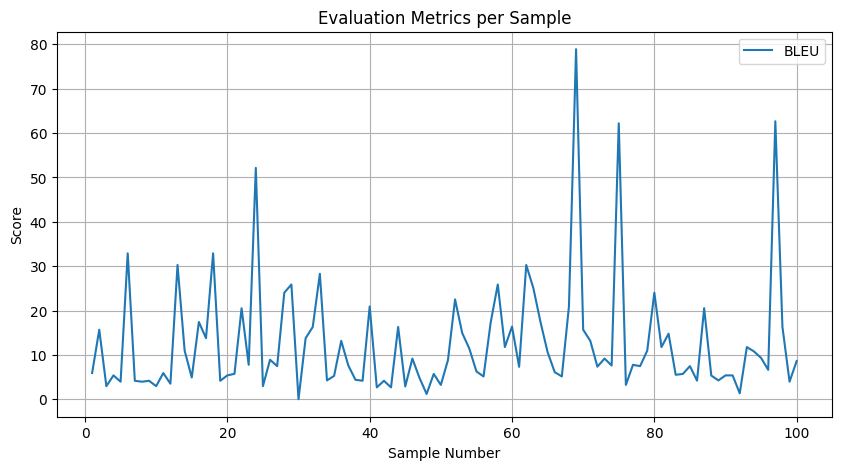

In [21]:
metrics(args,100)

<font color='#FF6F00'><h2>Итог</h2></font>
- Проанализировали и загрузили набор данных
- Составили цикл обучения модели
- Обучили модель на датасете
- Вычислили и сравнили итоговый результат по метрикам
- Сохранили модель